<a href="https://colab.research.google.com/github/JosefridahMwende/Mental_Heath_Analysis/blob/master/Week_5_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mental Health Review and Analysis**

##Requirement
Analyze the dataset below to determine:


*   Which social economic risk factors are associated with depression patients in Kenya?
*   Which demographic category in Kenya faces a  high risk of depression

###Data

Datasets below provided
*train set: https://drive.google.com/open?id=1xk-91FQpKnjwKkRT62LVnnoH0o5EnbfCr4dsS4HESYc

# Importing Essential Libraries


In [0]:
import pandas as pd #Data manipulation and analysis
import numpy as np #Numerical Processing on arrays and matrices
import matplotlib.pyplot as plt #Generating visualizations
import seaborn as sns #Visualizations based on matplot lib
import pandas_profiling as pp
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

# Loading Data and Review

In [0]:
#Import Dataset. Downloaded the content from URL above then uploaded onto the notebook.
url ='/content/train.csv'
df_mental1 = pd.read_csv(url)

In [0]:
#Check number of rows and columns
df_mental1.shape

(1143, 75)

In [0]:
#Display Sample records to validate records successfully imported 
df_mental1.iloc[:10]

,surveyid,village,survey_date,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
0,926,91,23-Nov-61,1,28.0,1,4,6,10,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,0.000000,0.000000,1,0.000000,0,0,5
1,747,57,24-Oct-61,1,23.0,1,3,5,8,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,1,4.804611,4.804611,0,0.000000,0,1,3
2,1190,115,05-Oct-61,1,22.0,1,3,5,9,0,NaN,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0.00000,0.000000,0,0.0,0,8.007685,8.007685,1,0.000000,0,0,5
3,1065,97,23-Sep-61,1,27.0,1,2,4,10,2,4.0,378.832920,526.671080,196.98904,24.023054,49.647648,0.0,0,289.173520,36.434967,0.0,0.000000,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.000000,22.288055,1.875133,16.282293,17.890503,0.0,0.0,0.0,0.0,3.0,1.0,1.0,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000,NaN,1,1,NaN,20.179367,10.089684,0.500000,1.500000,0.00,0,0,778.11230,69.219765,0,0.0,0,0.000000,0.000000,1,1.249199,0,0,0
4,806,42,12-Sep-61,0,59.0,0,4,6,10,4,6.0,258.671880,8.260629,173.52654,19.218445,0.000000,0.5,0,173.010990,0.870168,0.0,0.000000,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.000000,0.533846,2.073101,0.000000,2.073101,0.0,0.0,0.0,0.0,2.0,0.0,0.0,NaN,NaN,1.233183,0.333333,0.250000,0.500000,1.166667,1.0,1,1,NaN,27.226130,6.806532,0.750000,1.750000,1.25,1,0,201.00562,4.341945,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,3
5,483,25,08-Sep-61,1,35.0,1,6,8,10,6,8.0,63.790752,359.374660,73.67070,0.000000,0.000000,1.7,0,40.938339,2.268844,NaN,5.582501,0.000000,0.000000,2.669228,3.069613,11.531066,0,1,0,1,0,4.804611,4.804611,2.268844,0.189070,0.000000,4.993681,7.5,3.0,7.5,0.0,1.0,1.0,1.0,1.601537,NaN,NaN,0.125000,0.000000,1.000000,0.875000,0.0,1,1,NaN,32.030739,6.406148,0.800000,0.000000,1.50,0,0,444.25610,7.662910,0,0.0,0,0.000000,0.000000,0,0.000000,0,0,6
6,849,130,31-Oct-61,0,34.0,0,1,3,9,1,3.0,60.614365,4.130314,219.25041,0.000000,0.000000,1.0,0,48.963181,0.266923,0.0,0.000000,0.160154,0.160154,0.533846,0.066731,10.890451,0,0,0,0,0,0.000000,0.000000,0.266923,0.022244,0.000000,0.022244,20.0,3.0,20.0,0.0,1.0,0.0,1.0,0.053385,NaN,0.160154,1.000000,1.000000,0.333333,0.000000,0.0,1,1,NaN,6.406148,6.406148,1.000000,0.000000,1.00,0,0,225.62288,0.556089,0,0.0,0,0.000000,0.000000,0,0.000000,0,1,3

In [0]:
#previewing information about the dataset
pp.ProfileReport(df_mental1)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,75
Number of observations,1143
Total Missing (%),11.0%
Total size in memory,669.9 KiB
Average record size in memory,600.1 B
Numeric,53
Categorical,1
Boolean,13
Date,0
Text (Unique),0
Rejected,8


# Data Understanding

###Data Structure 
Exploration of:
- Dataset information. To check total counts per column, not null constraints and data types
- Dataset description. 
- Distinct values per column to identify categorical values
- Null values per column to identify missing values


In [0]:
#Dataframe Information to check data types, not null constraints
print(df_mental1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 75 columns):
surveyid                   1143 non-null int64
village                    1143 non-null int64
survey_date                1143 non-null object
femaleres                  1143 non-null int64
age                        1143 non-null float64
married                    1143 non-null int64
children                   1143 non-null int64
hhsize                     1143 non-null int64
edu                        1143 non-null int64
hh_children                1143 non-null int64
hh_totalmembers            809 non-null float64
cons_nondurable            1143 non-null float64
asset_livestock            1143 non-null float64
asset_durable              1143 non-null float64
asset_phone                1143 non-null float64
asset_savings              1143 non-null float64
asset_land_owned_total     1143 non-null float64
asset_niceroof             1143 non-null int64
cons_allfood               1143

In [0]:
#Descriptive statistics
df_mental1.describe()

,surveyid,village,femaleres,age,married,children,hhsize,edu,hh_children,hh_totalmembers,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,asset_niceroof,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,ent_total_cost,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_meat,fs_enoughtom,fs_sleephun,med_expenses_hh_ep,med_expenses_sp_ep,med_expenses_child_ep,med_portion_sickinjured,med_port_sick_child,med_afford_port,med_sickdays_hhave,med_healthconsult,med_vacc_newborns,med_child_check,med_u5_deaths,ed_expenses,ed_expenses_perkid,ed_schoolattend,ed_sch_missedpc,ed_work_act_pc,labor_primary,wage_expenditures,durable_investment,nondurable_investment,given_mpesa,amount_given_mpesa,received_mpesa,amount_received_mpesa,net_mpesa,saved_mpesa,amount_saved_mpesa,early_survey,depressed,day_of_week
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,809.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1100.000000,1123.000000,1143.000000,724.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,727.000000,727.000000,809.000000,809.000000,809.000000,450.000000,265.000000,543.000000,809.000000,727.000000,720.000000,809.000000,720.000000,1143.0,1143.0,59.000000,680.000000,680.000000,680.000000,676.000000,572.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,715.927384,76.409449,0.916885,34.537270,0.772528,2.860017,4.869641,8.735783,2.018373,4.906057,128.407607,113.703653,148.571309,19.656758,10.254082,0.926868,0.000875,95.806020,8.323766,1.177717,0.634804,2.690428,1.829645,2.794807,3.647826,21.706431,0.186352,0.247594,0.107612,0.269466,0.032371,34.848492,17.321227,4.516265,1.866727,3.932084,21.414848,4.042870,0.910324,2.899587,0.440853,3.070457,0.274413,0.367120,5.626042,8.051863,3.722442,0.519817,0.496440,0.797353,1.955721,0.695412,1.0,1.0,0.510452,52.934778,18.611665,0.704684,1.355635,0.745047,0.221347,24.356955,288.501084,34.463737,0.015748,0.553462,0.066492,3.564576,3.011114,0.188976,2.269096,0.097988,0.168854,3.295713
std,415.694525,66.788138,0.276176,13.742107,0.419383,1.846946,2.121852,2.867202,2.016702,2.099287,140.159957,239.698375,198.422016,28.053082,79.808523,1.663766,0.029579,114.487290,15.148661,6.740545,2.746150,12.141003,10.923501,8.331795,7.574917,28.397228,0.389561,0.431804,0.310025,0.443877,0.392355,257.963415,100.532226,8.626985,3.506706,12.199986,101.386778,6.246393,2.594545,5.274774,1.678111,2.205131,0.446494,0.482318,10.942463,17.940287,14.641253,0.321305,0.374030,0.330447,3.359077,0.375157,0.0,0.0,0.222380,117.267036,31.555958,0.341665,2.688571,0.837033,0.415336,798.985512,385.345212,134.058379,0.124554,6.489140,0.249249,24.950902,25.840639,0.391661,19.676268,0.297428,0.374787,1.684910
min,1.000000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-160.153700,0.000000,0.000000,0.000000,0.000000,0.00000

In [0]:
#Null values for each column.
print(df_mental1.isnull().sum())

surveyid              0
village               0
survey_date           0
femaleres             0
age                   0
                     ..
saved_mpesa           0
amount_saved_mpesa    0
early_survey          0
depressed             0
day_of_week           0
Length: 75, dtype: int64


In [0]:
#checking for duplicates
df_mental1.duplicated().sum()

0

In [0]:
df_mental1['med_u5_deaths'].corr(df_mental1['depressed'])

-0.1580071831028005

In [0]:
#dropping unnecessary columns
df_mental = df_mental1.drop(['hhsize','hh_totalmembers','labor_primary','wage_expenditures','survey_date','day_of_week','given_mpesa','amount_given_mpesa','received_mpesa','amount_received_mpesa','saved_mpesa','early_survey','med_u5_deaths','ed_expenses','med_vacc_newborns','med_child_check','ed_schoolattend','ed_sch_missedpc','village','med_expenses_hh_ep','med_expenses_sp_ep','med_expenses_child_ep','fs_meat','asset_niceroof','med_sickdays_hhave','ent_total_cost','med_healthconsult','med_afford_port','ed_work_act_pc'], axis=1)
df_mental[:5]

,surveyid,femaleres,age,married,children,edu,hh_children,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_enoughtom,fs_sleephun,med_portion_sickinjured,med_port_sick_child,ed_expenses_perkid,durable_investment,nondurable_investment,net_mpesa,amount_saved_mpesa,depressed
0,926,1,28.0,1,4,10,0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0
1,747,1,23.0,1,3,8,0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,4.804611,0.000000,1
2,1190,1,22.0,1,3,9,0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,8.007685,0.000000,0
3,1065,1,27.0,1,2,10,2,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.00,10.089684,778.11230,69.219765,0.000000,1.249199,0
4,806,0,59.0,0,4,10,4,258.67188,8.260629,173.52654,19.218445,0.000000,0.5,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.25,6.806532,201.00562,4.341945,0.000000,0.000000,0


In [0]:
#merging columns
df_mental['income_metric'] = (df_mental['ent_wagelabor']+df_mental['ent_ownfarm']+df_mental['ent_business']+df_mental['ent_nonagbusiness'])/4
df_mental['assets'] = df_mental['asset_livestock'] + df_mental['asset_durable']+ df_mental['asset_phone']+ df_mental['asset_savings']
df_mental['savings'] = df_mental['asset_savings'] + df_mental['amount_saved_mpesa']
df_mental['all_expenses'] = df_mental['cons_allfood'] + df_mental['cons_ownfood']+ df_mental['cons_alcohol']+ df_mental['cons_tobacco']+ df_mental['cons_ed']+ df_mental['cons_social']+ df_mental['cons_other']
df_mental.iloc[:10]

,surveyid,femaleres,age,married,children,edu,hh_children,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_enoughtom,fs_sleephun,med_portion_sickinjured,med_port_sick_child,ed_expenses_perkid,durable_investment,nondurable_investment,net_mpesa,amount_saved_mpesa,depressed,income_metric,assets,savings,all_expenses
0,926,1,28.0,1,4,10,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0,0.00,0.000000,0.000000,0.000000
1,747,1,23.0,1,3,8,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,4.804611,0.000000,1,0.00,0.000000,0.000000,0.000000
2,1190,1,22.0,1,3,9,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,8.007685,0.000000,0,0.00,0.000000,0.000000,0.000000
3,1065,1,27.0,1,2,10,2,378.832920,526.671080,196.98904,24.023054,49.647648,0.0,289.173520,36.434967,0.0,0.000000,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.000000,22.288055,1.875133,16.282293,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.000000,10.089684,778.11230,69.219765,0.000000,1.249199,0,0.50,797.330822,50.896847,411.103868
4,806,0,59.0,0,4,10,4,258.671880,8.260629,173.52654,19.218445,0.000000,0.5,173.010990,0.870168,0.0,0.000000,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.000000,0.533846,2.073101,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.250000,6.806532,201.00562,4.341945,0.000000,0.000000,0,0.25,201.005614,0.000000,258.741266
5,483,1,35.0,1,6,10,6,63.790752,359.374660,73.67070,0.000000,0.000000,1.7,40.938339,2.268844,NaN,5.582501,0.000000,0.000000,2.669228,3.069613,11.531066,0,1,0,1,0,4.804611,4.804611,2.268844,0.189070,0.000000,7.5,3.0,7.5,0.0,1.0,1.0,0.125000,0.000000,6.406148,444.25610,7.662910,0.000000,0.000000,0,0.50,433.045360,0.000000,NaN
6,849,0,34.0,0,1,9,1,60.614365,4.130314,219.25041,0.000000,0.000000,1.0,48.963181,0.266923,0.0,0.000000,0.160154,0.160154,0.533846,0.066731,10.890451,0,0,0,0,0,0.000000,0.000000,0.266923,0.022244,0.000000,20.0,3.0,20.0,0.0,0.0,1.0,1.000000,1.000000,6.406148,225.62288,0.556089,0.000000,0.000000,1,0.00,223.380724,0.000000,60.721131
7,1386,1,21.0,1,2,10,2,118.070460,120.136330,203.23505,67.264557,48.046108,0.0,108.568010,6.099187,0.0,0.000000,0.000000,0.000000,2.856074,0.800768,5.845610,0,0,1,0,0,0.000000,0.000000,9.275569,3.697993,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.500000,0.500000,17.136446,339.22659,54.600174,0.000000,0.000000,0,0.25,438.682045,48.046108,124.169650
8,930,1,32.0,1,7,9,7,581.574160,1108.756800,252.24208,24.023054,80.076851,4.0,469.092860,40.572273,0.0,0.000000,0.000000,0.000000,15.134524,30.162281,67.184479,1,0,0,0,0,0.000000,0.000000,32.564587,28.738691,24.690361,3.0,0.0,3.0,0.0,1.0,0.0,0.111111,0.142857,30.269049,1401.83810,151.176190,0.000000,0.000000,0,0.25,1465.098785,80.076851,622.146417
9,390,1,29.0,1,4,10,0,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0,0.00,0.000000,0.000000,0.000000


In [0]:
#To find the correlation among the columns using pearson method 
df_mental.corr(method ='pearson') 

,surveyid,femaleres,age,married,children,edu,hh_children,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_enoughtom,fs_sleephun,med_portion_sickinjured,med_port_sick_child,ed_expenses_perkid,durable_investment,nondurable_investment,net_mpesa,amount_saved_mpesa,depressed,income_metric,assets,savings,all_expenses
surveyid,1.000000,0.025247,0.041632,-0.015671,0.031325,-0.039734,-0.000358,0.009463,-0.014050,-0.014745,0.007904,-0.041894,0.006408,0.007048,0.033928,-0.046983,-0.018385,0.023356,0.055774,0.009758,0.003512,0.017331,0.041704,-0.016150,-0.022694,-0.044598,0.041446,0.030809,0.027079,0.050443,-0.000727,0.010538,-0.013598,-0.035308,0.055441,0.014747,0.012083,-0.013136,-0.004763,0.013755,0.030316,-0.015080,-0.003667,-0.009799,0.020514,-0.019913,-0.022702,-0.024199,-0.035744,0.011321
femaleres,0.025247,1.000000,-0.137133,0.275119,0.224375,-0.075308,0.197696,0.075143,0.098825,0.080056,0.146438,0.004836,-0.011430,0.077114,0.053062,-0.036424,-0.017309,-0.104665,-0.247580,0.045501,0.068426,0.083794,-0.026831,0.077257,0.084098,0.097141,0.024851,0.037984,0.046245,0.038787,0.054697,-0.009101,-0.026612,-0.025686,-0.029205,0.014885,0.048226,-0.051339,-0.019778,0.049900,-0.065245,0.109791,0.044431,-0.037609,-0.008594,-0.008112,0.119074,0.113263,0.002636,0.083634
age,0.041632,-0.137133,1.000000,-0.400452,-0.111424,-0.393277,-0.070510,-0.028535,0.059959,-0.089134,-0.182611,-0.013263,0.255802,-0.024760,0.001672,0.017133,0.063398,0.016852,0.074042,0.136876,-0.033437,-0.090097,-0.069262,0.121044,-0.014610,-0.079885,-0.021629,-0.018880,-0.022457,-0.004174,-0.011996,0.005912,0.069274,0.175732,0.134216,0.176515,-0.069473,0.173012,0.022976,-0.056751,0.281209,-0.008344,-0.015366,0.022718,-0.018136,0.100159,-0.019010,-0.024405,-0.017208,-0.027484
married,-0.015671,0.275119,-0.400452,1.000000,0.220000,0.197570,0.152999,0.152086,0.087219,0.130177,0.183254,0.030777,-0.059359,0.135823,0.098973,0.065428,0.057169,0.080820,0.046998,0.031813,0.064763,0.122417,0.029219,0.025988,-0.040550,0.056735,0.012859,-0.051447,-0.051998,0.051820,0.085054,0.091809,-0.058782,-0.116943,-0.136237,-0.060233,0.057248,-0.128141,-0.031734,-0.030182,-0.070316,0.132931,-0.012625,-0.003645,0.034929,-0.078541,0.045531,0.139650,0.038221,0.146215
children,0.031325,0.224375,-0.111424,0.220000,1.000000,0.161839,0.635439,0.087106,0.057976,0.053513,0.083350,-0.004988,-0.050573,0.067120,0.027730,-0.003870,0.020997,0.000459,-0.005654,0.139472,0.043881,0.105720,-0.020913,0.043496,0.023272,0.038574,0.013509,0.042679,0.038918,0.025947,0.045339,0.029335,0.040369,-0.014591,0.189290,0.040979,-0.018228,0.002872,-0.198090,-0.183488,-0.078878,0.071683,0.038388,-0.001945,-0.004842,0.012671,0.045216,0.067995,-0.005999,0.090420
edu,-0.039734,-0.075308,-0.393277,0.197570,0.161839,1.000000,0.088674,0.068829,-0.005434,0.161358,0.164155,0.073908,-0.110453,0.038722,0.021543,-0.010725,-0.035379,0.099090,0.111292,-0.005549,0.077336,0.128275,0.022953,-0.040475,-0.005419,0.009893,0.018507,0.037237,0.065171,0.023413,0.061760,-0.008379,-0.019609,-0.073402,-0.035757,-0.069888,0.061849,-0.119958,0.012335,0.101551,-0.018288,0.091977,0.095250,0.020912,0.039023,-0.122236,-0.007530,0.105940,0.081053,0.063221
hh_children,-0.000358,0.197696,-0.070510,0.152999,0.635439,0.088674,1.000000,0.462452,0.251237,0.361770,0.369017,0.049100,0.186382,0.411015,0.254912,0.072683,0.117362,0.092982,-0.005654,0.267846,0.241339,0.416107,0.180661,0.279344,0.166300,0.288904,0.046834,0.095514,0.107610,0.242432,0.263878,0.161492,0.307322,0.133193,0.189290,0.040979,-0.018228,0.002872,-0.198090,-0.183488,-0.078878,0.378375,0.142540,0.037985,0.014934,0.00

### Distribution

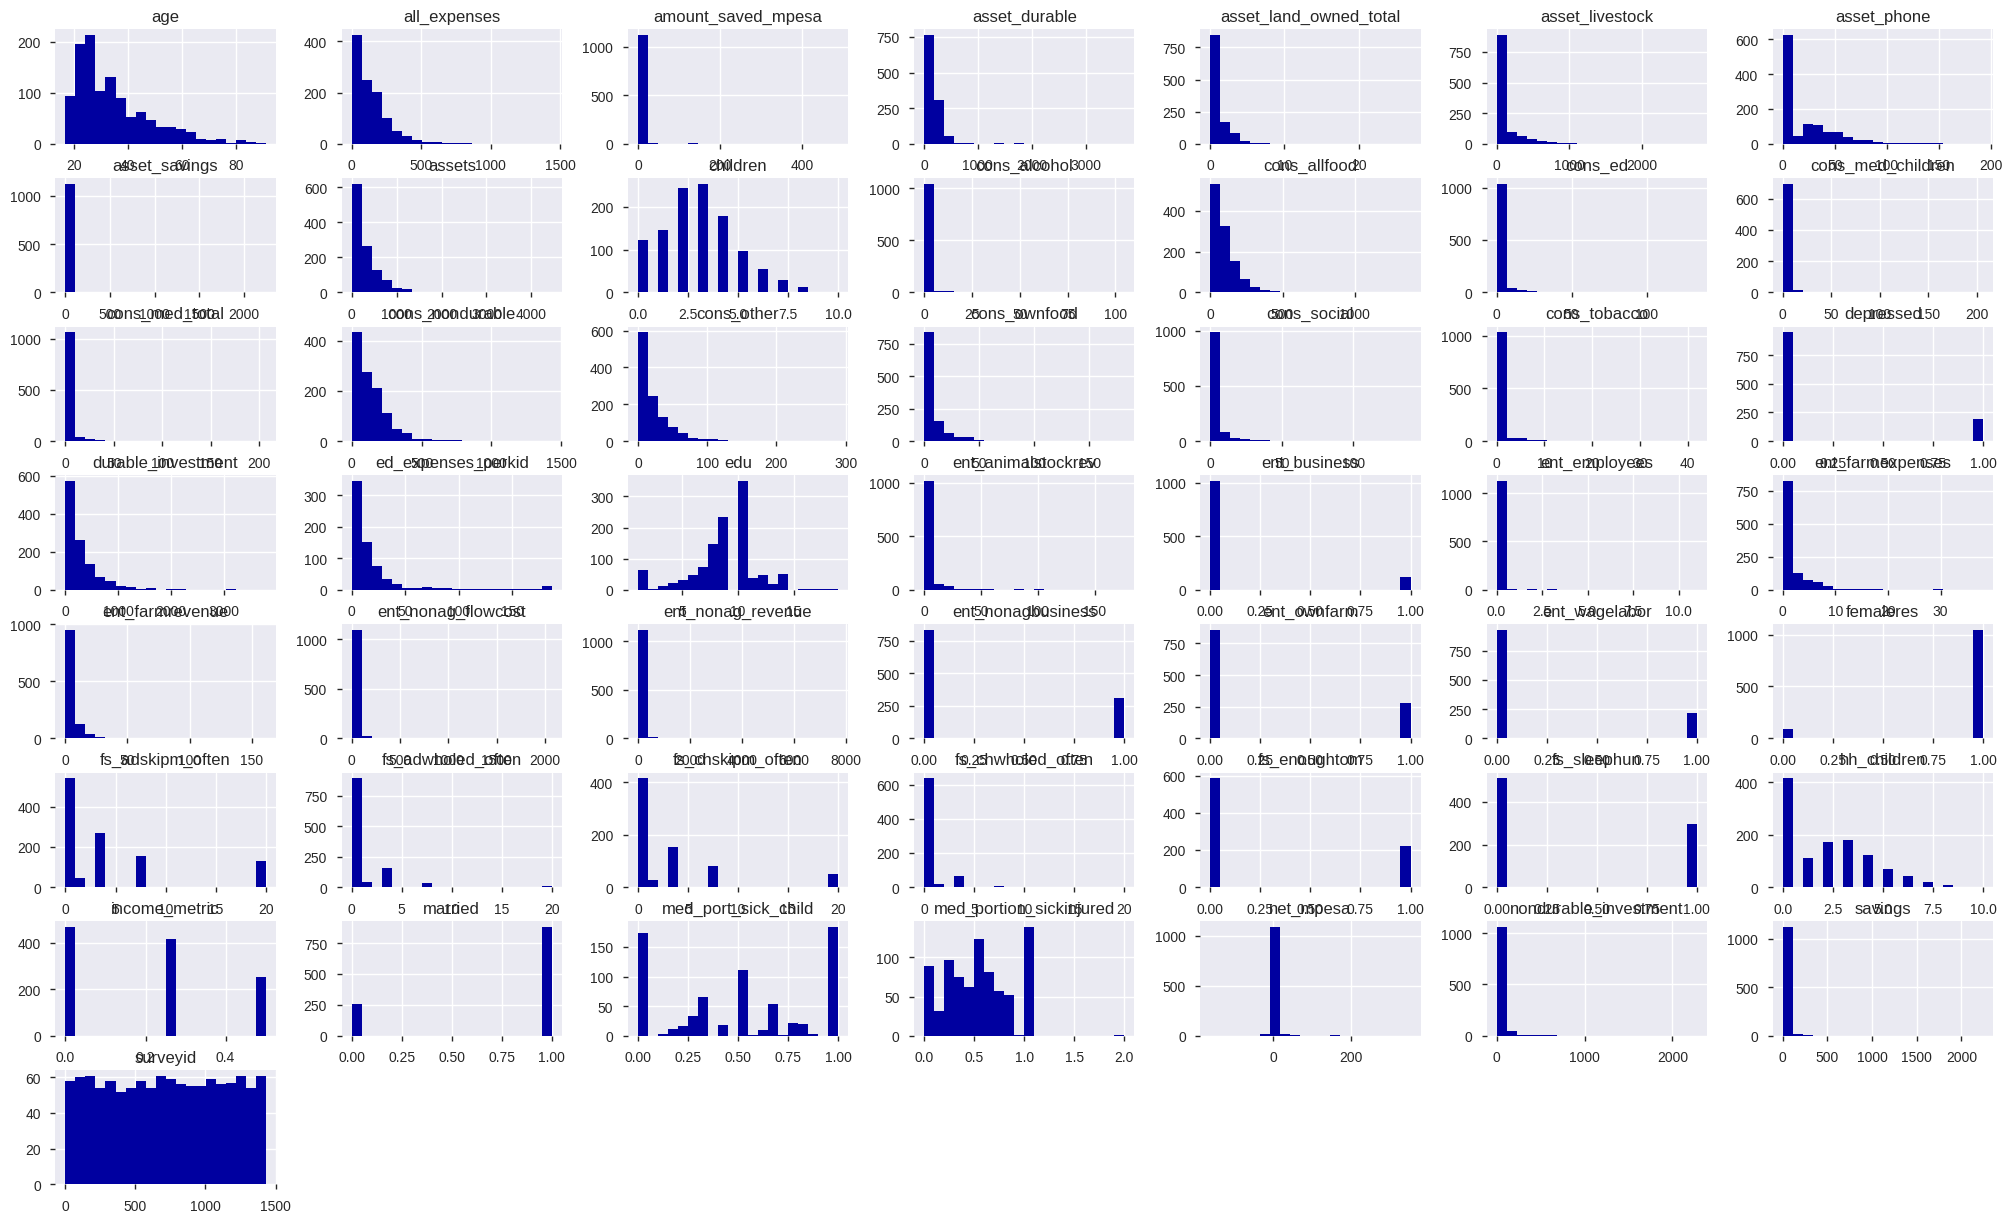

In [0]:
df_mental.hist( bins=20, figsize=(25,15), color='#0000A0', zorder=2, rwidth=10)
plt.show()

# Data Analysis


## 1. Income sources



In [0]:
#check if having 0 or more sources of income is a cause
df_mental.groupby(['income_metric','depressed'])['income_metric'].count()

income_metric  depressed
0.00           0            386
               1             84
0.25           0            350
               1             69
0.50           0            214
               1             40
Name: income_metric, dtype: int64

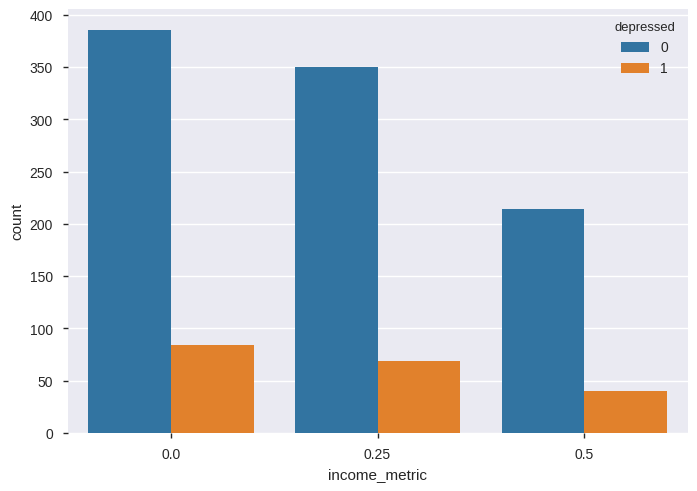

In [0]:
#income metrics vs depressed
ax = sns.countplot(x = 'income_metric', hue = 'depressed', data = df_mental)

Text(0.5, 1.0, 'Income metric with respect to Depression')

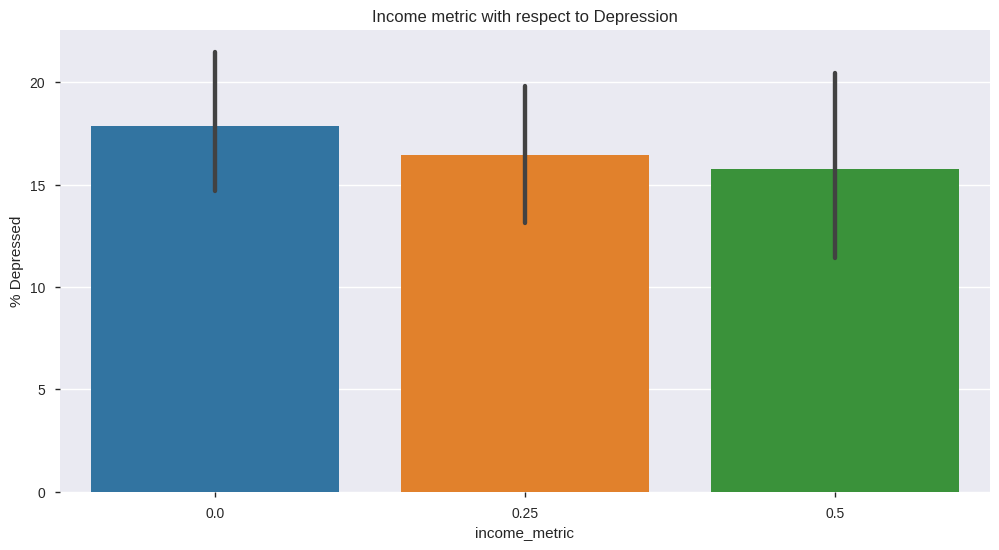

In [0]:
#checking percentage of depressed people per number of income sources

fig, ax = plt.subplots(figsize = (12,6))

ax = sns.barplot(x = 'income_metric',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")
plt.title("Income metric with respect to Depression")

## 2. Land ownership

In [0]:
# replacing land values with 1 or 0
df_mental.loc[df_mental.asset_land_owned_total>0, ['asset_land_owned_total']] = 1
df_mental.iloc[:5]

,surveyid,femaleres,age,married,children,edu,hh_children,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_enoughtom,fs_sleephun,med_portion_sickinjured,med_port_sick_child,ed_expenses_perkid,durable_investment,nondurable_investment,net_mpesa,amount_saved_mpesa,depressed,income_metric,assets,savings,all_expenses
0,926,1,28.0,1,4,10,0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0,0.00,0.000000,0.000000,0.000000
1,747,1,23.0,1,3,8,0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,4.804611,0.000000,1,0.00,0.000000,0.000000,0.000000
2,1190,1,22.0,1,3,9,0,0.00000,0.000000,0.00000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,8.007685,0.000000,0,0.00,0.000000,0.000000,0.000000
3,1065,1,27.0,1,2,10,2,378.83292,526.671080,196.98904,24.023054,49.647648,0.0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.00,10.089684,778.11230,69.219765,0.000000,1.249199,0,0.50,797.330822,50.896847,411.103868
4,806,0,59.0,0,4,10,4,258.67188,8.260629,173.52654,19.218445,0.000000,1.0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.25,6.806532,201.00562,4.341945,0.000000,0.000000,0,0.25,201.005614,0.000000,258.741266


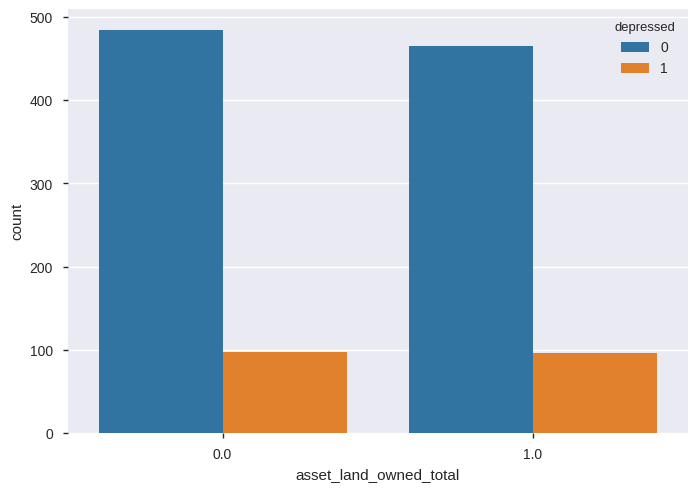

In [0]:
# checking against land ownership and depression
ax = sns.countplot(x = 'asset_land_owned_total', hue = 'depressed', data = df_mental)

## 3. Assets ownership

In [0]:
#assets column description
df_mental['assets'].describe()

count    1143.000000
mean      292.185802
std       389.069954
min         0.000000
25%         0.000000
50%       194.983339
75%       413.379925
max      4456.308539
Name: assets, dtype: float64

<function matplotlib.pyplot.show>

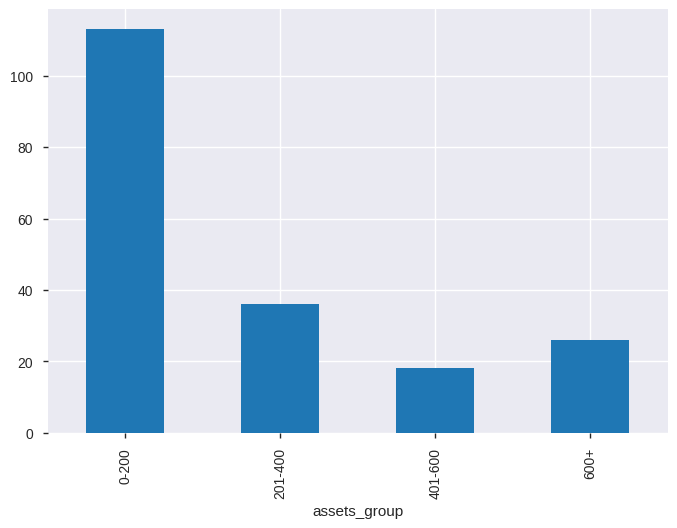

In [0]:
#assets vs depression rate
bins = [0,201,401,600,4500]
labels = ['0-200','201-400','401-600','600+']
df_mental['assets_group'] = pd.cut(df_mental['assets'], bins = bins,  labels = labels, right =False)

df_mental.groupby('assets_group')['depressed'].sum().plot(kind='bar')
plt.show

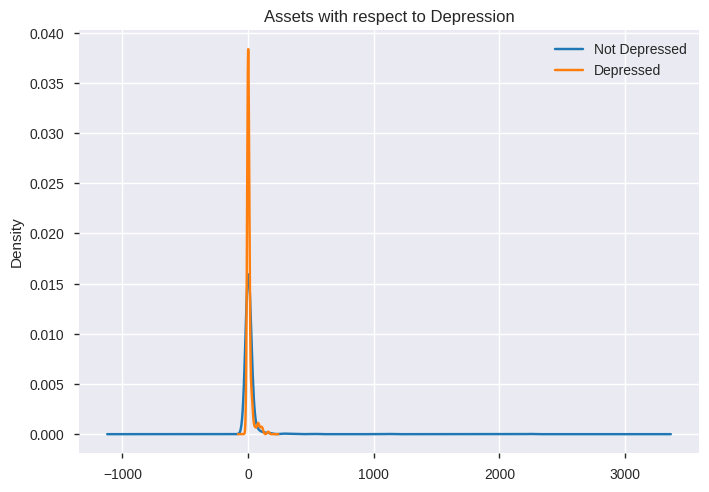

In [0]:
#assets vs depression rate
for x in [0,1]:  
    df_mental.savings[df_mental.depressed == x].plot(kind="kde")
plt.title("Assets with respect to Depression")
plt.legend(("Not Depressed","Depressed"))

## 4. Savings

In [0]:
#savings column description
df_mental['savings'].describe()

count    1143.000000
mean       12.523179
std        82.246585
min         0.000000
25%         0.000000
50%         0.000000
75%         3.203074
max      2242.151900
Name: savings, dtype: float64

<function matplotlib.pyplot.show>

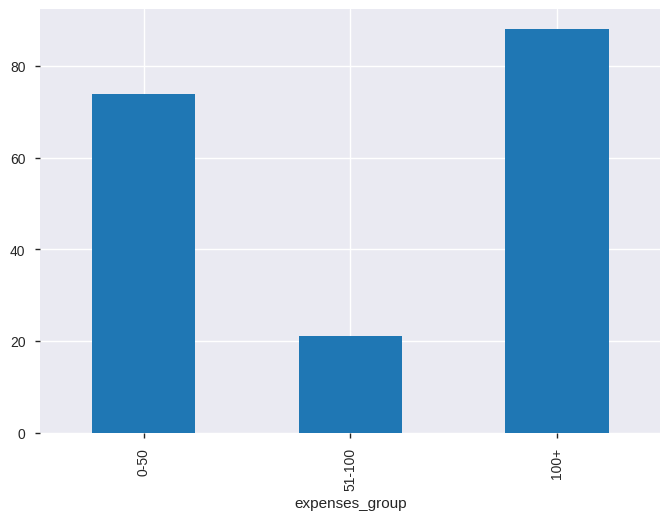

In [0]:
#savings vs depression rate
bins = [0,51,101,2300]
labels = ['0-50','51-100','100+']
df_mental['expenses_group'] = pd.cut(df_mental['all_expenses'], bins = bins,  labels = labels, right =False)

df_mental.groupby('expenses_group')['depressed'].sum().plot(kind='bar')
plt.show

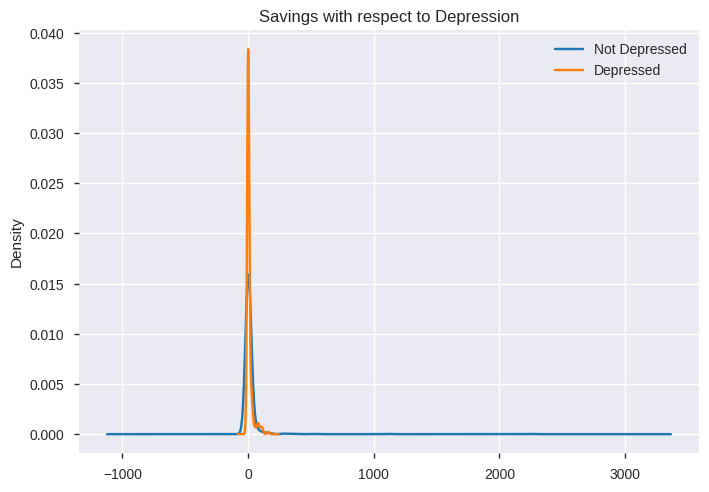

In [0]:
#savings vs depression rate
for x in [0,1]:  
    df_mental.savings[df_mental.depressed == x].plot(kind="kde")
plt.title("Savings with respect to Depression")
plt.legend(("Not Depressed","Depressed"))

## 5. Expenditure

<function matplotlib.pyplot.show>

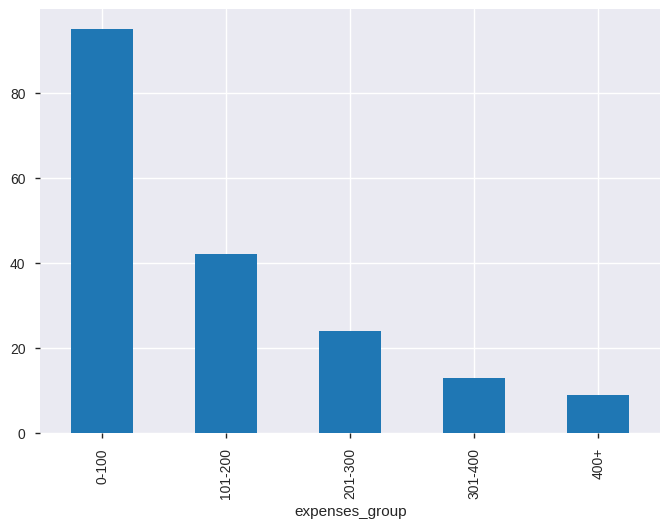

In [0]:
#expenditure vs depression rate
bins = [0,101,201,301,400,1500]
labels = ['0-100','101-200','201-300','301-400','400+']
df_mental['expenses_group'] = pd.cut(df_mental['all_expenses'], bins = bins,  labels = labels, right =False)

df_mental.groupby('expenses_group')['depressed'].sum().plot(kind='bar')
plt.show

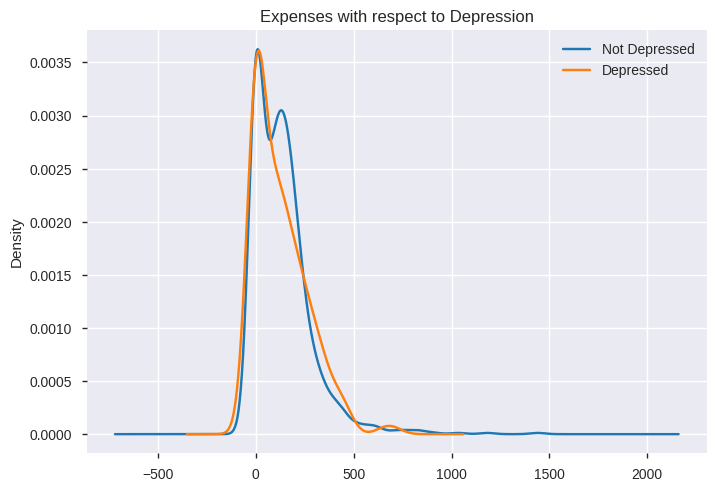

In [0]:
#depression vs expenses
for x in [0,1]:  
    df_mental.all_expenses[df_mental.depressed == x].plot(kind="kde")
plt.title("Expenses with respect to Depression")
plt.legend(("Not Depressed","Depressed"))

In [0]:
#phone owners vs depression rate
df_mental.loc[df_mental.asset_phone>0, ['asset_phone']] = 1
df_mental.iloc[:5]


,surveyid,femaleres,age,married,children,edu,hh_children,cons_nondurable,asset_livestock,asset_durable,asset_phone,asset_savings,asset_land_owned_total,cons_allfood,cons_ownfood,cons_alcohol,cons_tobacco,cons_med_total,cons_med_children,cons_ed,cons_social,cons_other,ent_wagelabor,ent_ownfarm,ent_business,ent_nonagbusiness,ent_employees,ent_nonag_revenue,ent_nonag_flowcost,ent_farmrevenue,ent_farmexpenses,ent_animalstockrev,fs_adskipm_often,fs_adwholed_often,fs_chskipm_often,fs_chwholed_often,fs_enoughtom,fs_sleephun,med_portion_sickinjured,med_port_sick_child,ed_expenses_perkid,durable_investment,nondurable_investment,net_mpesa,amount_saved_mpesa,depressed,income_metric,assets,savings,all_expenses,assets_group,expenses_group
0,926,1,28.0,1,4,10,0,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,0.000000,0.000000,0,0.00,0.000000,0.000000,0.000000,0-200,0-100
1,747,1,23.0,1,3,8,0,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,4.804611,0.000000,1,0.00,0.000000,0.000000,0.000000,0-200,0-100
2,1190,1,22.0,1,3,9,0,0.00000,0.000000,0.00000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.000000,NaN,0.000000,0.000000,0.000000,0,0,0,0,0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,8.007685,0.000000,0,0.00,0.000000,0.000000,0.000000,0-200,0-100
3,1065,1,27.0,1,2,10,2,378.83292,526.671080,196.98904,1.0,49.647648,0.0,289.17352,36.434967,0.0,0.0,4.163996,0.960922,1.681614,39.771500,44.042267,0,1,0,1,0,32.030739,0.0,22.288055,1.875133,16.282293,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.00,10.089684,778.11230,69.219765,0.000000,1.249199,0,0.50,797.330822,50.896847,411.103868,600+,400+
4,806,0,59.0,0,4,10,4,258.67188,8.260629,173.52654,1.0,0.000000,1.0,173.01099,0.870168,0.0,0.0,0.800768,0.800768,2.268844,8.087762,74.503502,1,0,0,0,0,0.000000,0.0,0.533846,2.073101,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.25,6.806532,201.00562,4.341945,0.000000,0.000000,0,0.25,201.005614,0.000000,258.741266,201-400,201-300


## 6. Mobile Phone Ownership

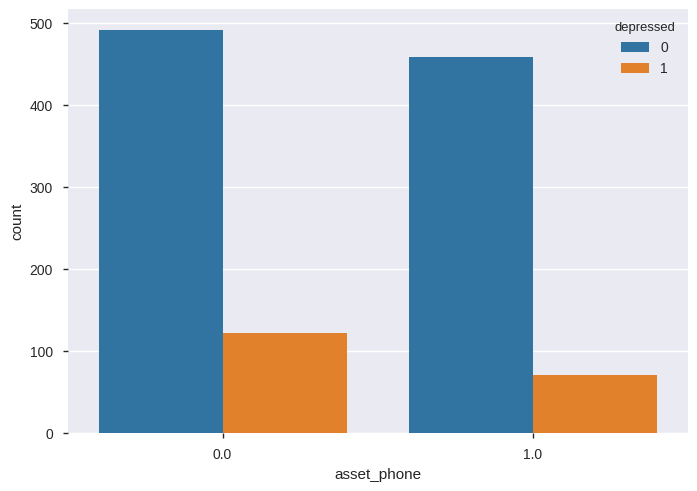

In [0]:
#phone vs depression rate
ax = sns.countplot(x = 'asset_phone', hue = 'depressed', data = df_mental)

## 7. Age

In [0]:
bins = [0,19,26,35,55,65,100]
labels = ['0-18','19-25','26-34','35-54','55-64','65+']
df_mental['age_group'] = pd.cut(df_mental['age'], bins = bins,  labels = labels, right =False)

In [0]:
# df_mental[df_mental['age_group']=='65+']
df_mental.groupby('age_group')['age_group'].count()

age_group
0-18      23
19-25    323
26-34    345
35-54    334
55-64     68
65+       50
Name: age_group, dtype: int64

<function matplotlib.pyplot.show>

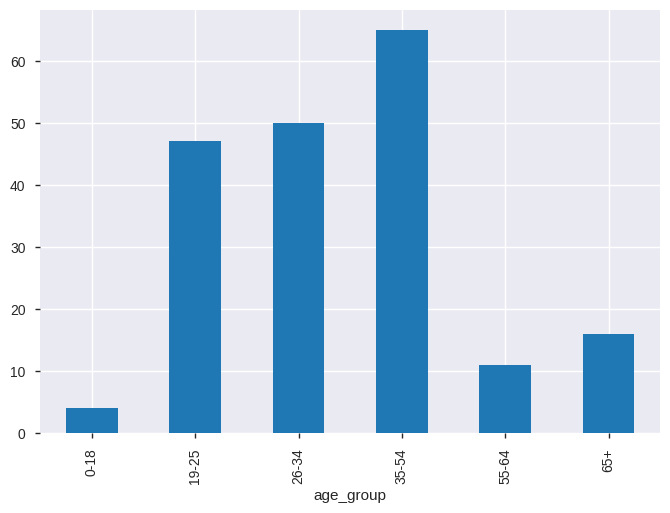

In [0]:
#Diagrammatic representation
df_mental.groupby('age_group')['depressed'].sum().plot(kind='bar')
plt.show

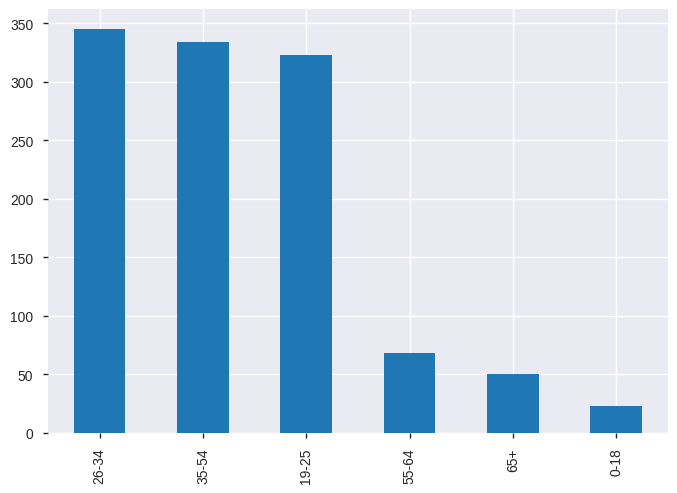

In [0]:
df_mental['age_group'].value_counts().plot(kind='bar')

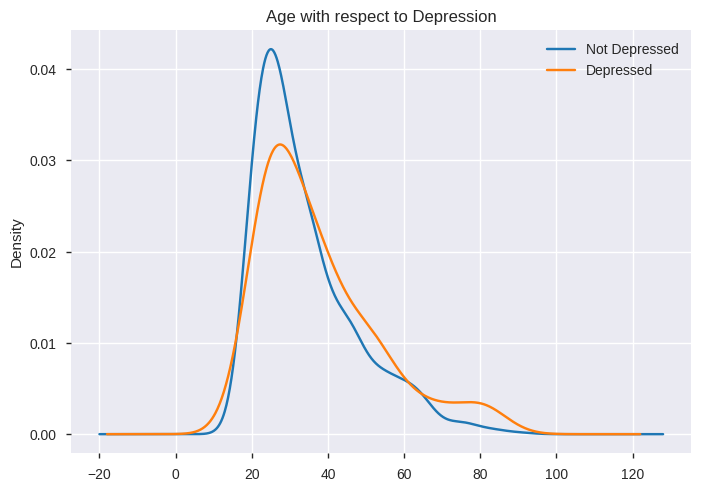

In [0]:

for x in [0,1]:  
    df_mental.age[df_mental.depressed == x].plot(kind="kde")
plt.title("Age with respect to Depression")
plt.legend(("Not Depressed","Depressed"))

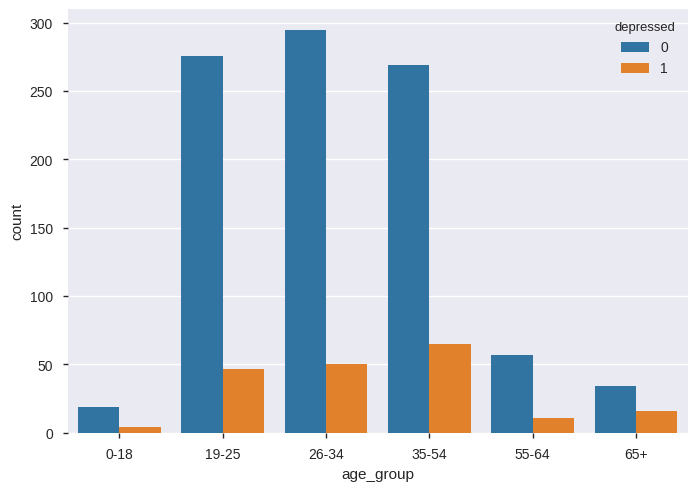

In [0]:

ax = sns.countplot(x = 'age_group', hue = 'depressed', data = df_mental)

[Text(0, 0.5, '% Depressed')]

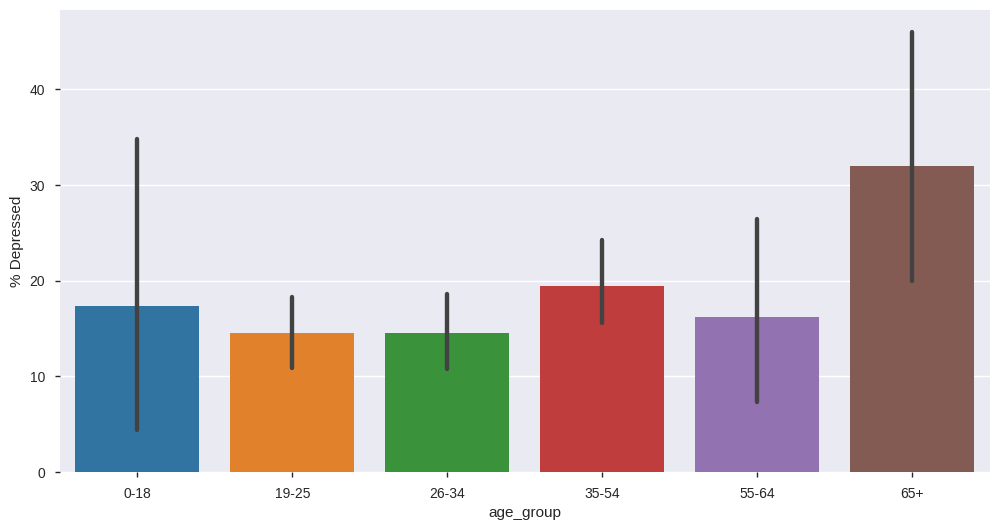

In [0]:

fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'age_group',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

## 8. Gender

In [0]:
#Gender
df_mental.groupby('femaleres')['depressed'].sum()

femaleres
0     17
1    176
Name: depressed, dtype: int64

<function matplotlib.pyplot.show>

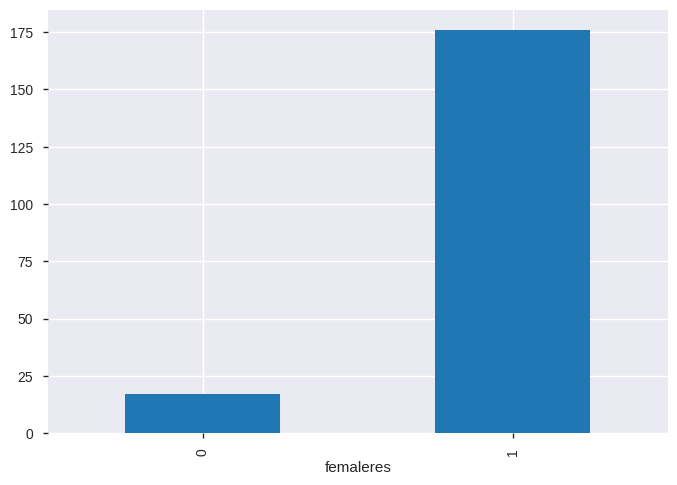

In [0]:
#Bar chart
df_mental.groupby('femaleres')['depressed'].sum().plot(kind='bar')
plt.show

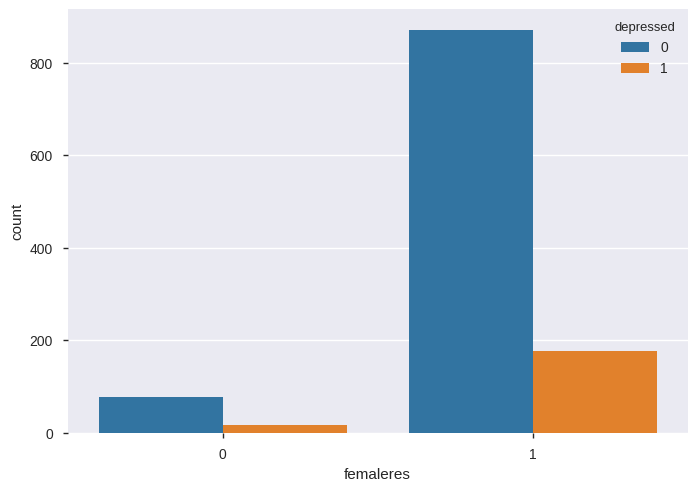

In [0]:
#Depression per Gender Countplot
ax = sns.countplot(x = 'femaleres', hue = 'depressed', data = df_mental)

[Text(0, 0.5, '% Depressed')]

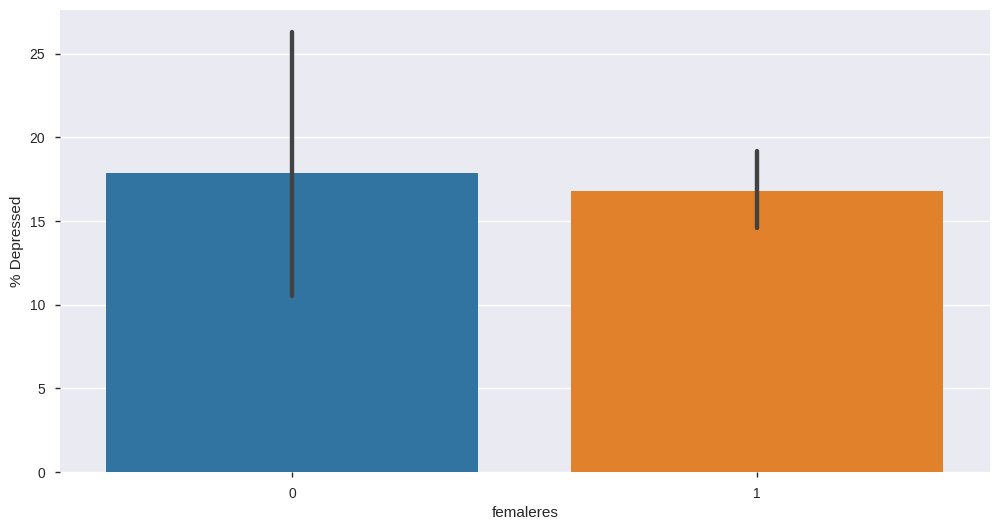

In [0]:
# Percentage of gender versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'femaleres',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

## 9. Marital Status

Total Count of Married and Single Persons
married
0    260
1    883
Name: married, dtype: int64
Depression Count by Marital Status
married
0     58
1    135
Name: depressed, dtype: int64
Bar Graph of Depression by Marital Status


[Text(0, 0.5, '% Depressed')]

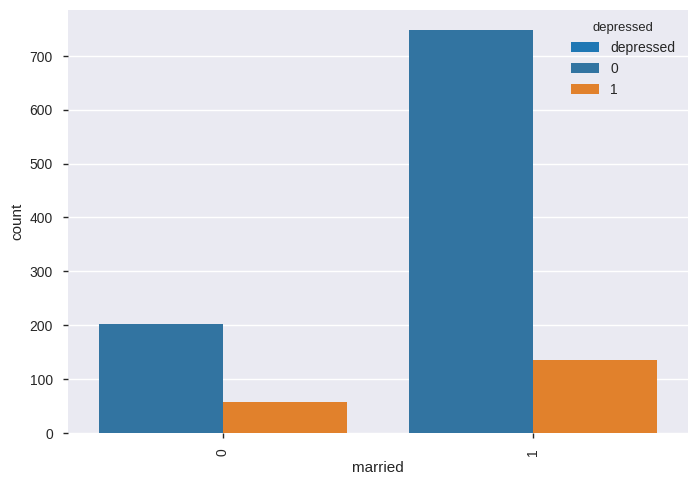

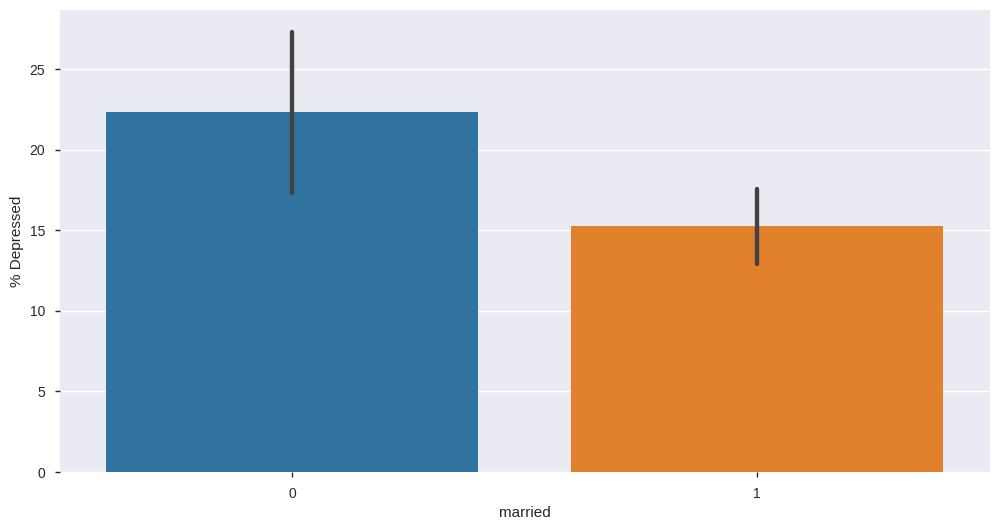

In [0]:
#Marital status versus depression evaluation
## Count of Married versus Single
print("Total Count of Married and Single Persons")
print(df_mental.groupby('married')['married'].count())

## Count of Married versus Single
print("Depression Count by Marital Status")
print(df_mental.groupby('married')['depressed'].sum())

#Bar chart
print("Bar Graph of Depression by Marital Status")
df_mental.groupby('married')['depressed'].sum().plot(kind='bar')
plt.show

#Countplot of Depression sum by Marital Status 
ax = sns.countplot(x = 'married', hue = 'depressed', data = df_mental)

# Barplot of Percentage of Marital Status versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'married',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

## 10. Children

Total Count of No of children per household
hh_children
0     416
1     110
2     174
3     180
4     122
5      69
6      41
7      21
8       8
9       1
10      1
Name: hh_children, dtype: int64
             count      mean       std  min  25%  50%  75%  max
hh_children                                                    
0            416.0  0.187500  0.390782  0.0  0.0  0.0  0.0  1.0
1            110.0  0.100000  0.301373  0.0  0.0  0.0  0.0  1.0
2            174.0  0.160920  0.368517  0.0  0.0  0.0  0.0  1.0
3            180.0  0.144444  0.352520  0.0  0.0  0.0  0.0  1.0
4            122.0  0.172131  0.379051  0.0  0.0  0.0  0.0  1.0
5             69.0  0.217391  0.415493  0.0  0.0  0.0  0.0  1.0
6             41.0  0.146341  0.357839  0.0  0.0  0.0  0.0  1.0
7             21.0  0.380952  0.497613  0.0  0.0  0.0  1.0  1.0
8              8.0  0.000000  0.000000  0.0  0.0  0.0  0.0  0.0
9              1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
10             1.0  0.000000      

[Text(0, 0.5, '% Depressed')]

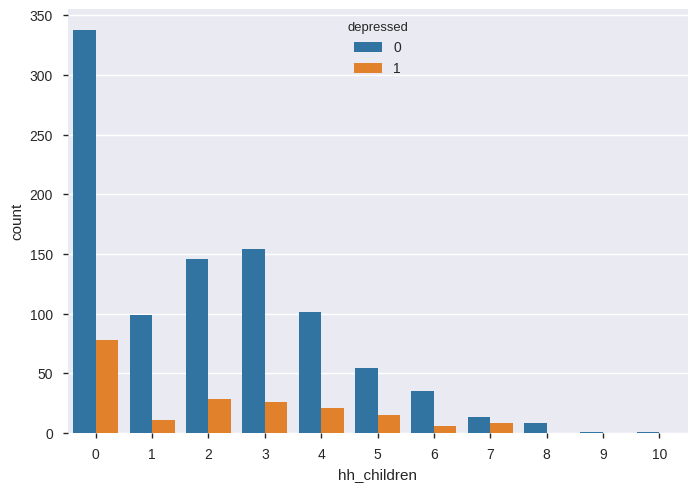

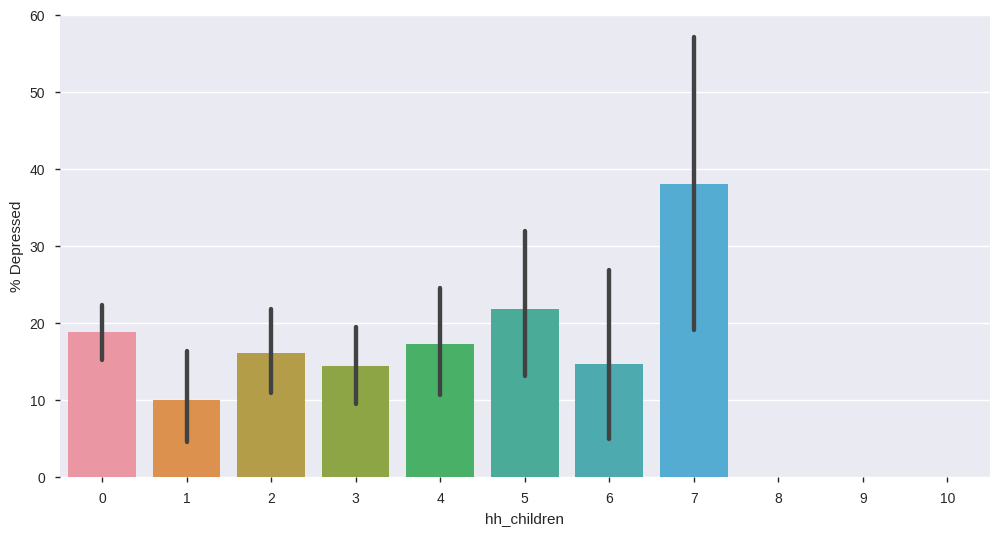

In [0]:
#Children versus depression evaluation
## Count of Children
print("Total Count of No of children per household")
print(df_mental.groupby('hh_children')['hh_children'].count())

print(df_mental.groupby('hh_children')['depressed'].describe())

## Count of depression by number of children
print("Depression Count by children")
print(df_mental.groupby('hh_children')['depressed'].sum())

#Bar chart
print("Bar Graph of Depression by number of children")
ax = sns.countplot(x="hh_children", hue="depressed", data=df_mental)
plt.show

# Barplot of Percentage of Marital Status versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'hh_children',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

## 11. Education

In [0]:
bins = [0, 9, 13, 20]
labels = ['primary','secondary','tertiary']
df_mental['education_level'] = pd.cut(df_mental['edu'], bins = bins,  labels = labels, right =False)

Total Count of No of years of education
education_level
primary      399
secondary    667
tertiary      77
Name: education_level, dtype: int64
                 count      mean       std  min  25%  50%  75%  max
education_level                                                    
primary          399.0  0.223058  0.416819  0.0  0.0  0.0  0.0  1.0
secondary        667.0  0.139430  0.346655  0.0  0.0  0.0  0.0  1.0
tertiary          77.0  0.142857  0.352222  0.0  0.0  0.0  0.0  1.0
Depression Count by education
education_level
primary      89
secondary    93
tertiary     11
Name: depressed, dtype: int64
Bar Graph of Depression by number of years of education


[Text(0, 0.5, '% Depressed')]

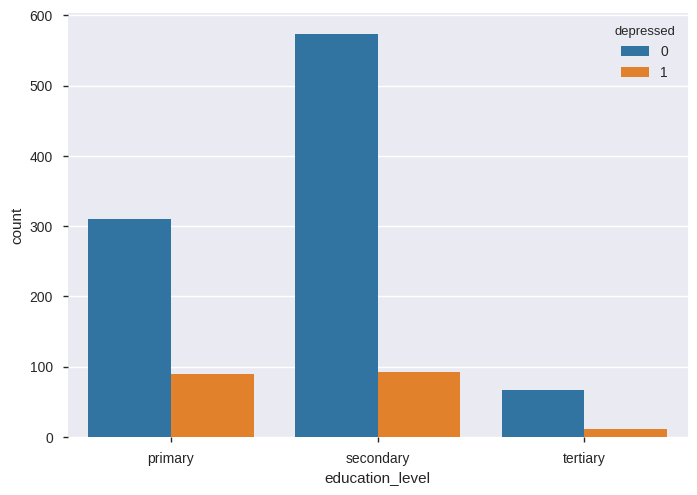

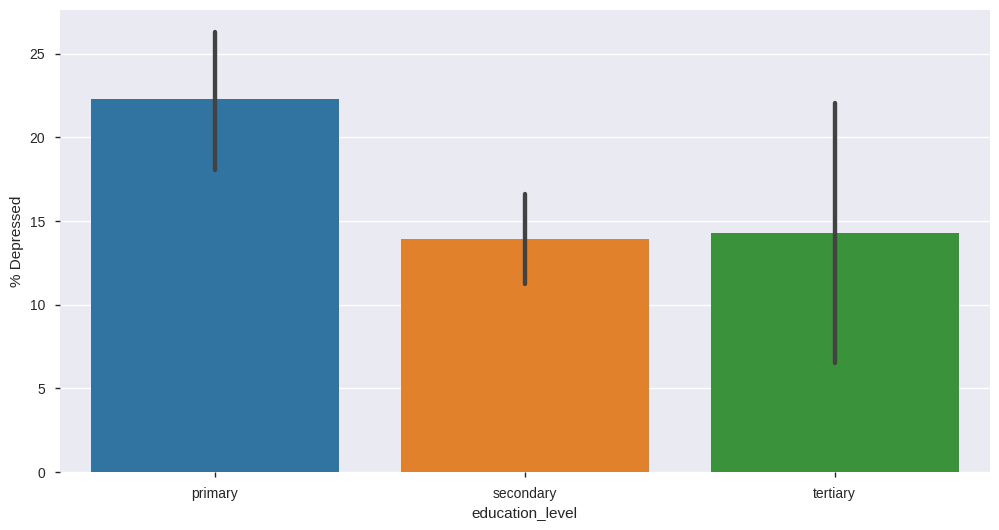

In [0]:
#Education versus depression evaluation
## Count of years of education 
print("Total Count of No of years of education")
print(df_mental.groupby('education_level')['education_level'].count())

print(df_mental.groupby('education_level')['depressed'].describe())

## Count of depression by number of years of education
print("Depression Count by education")
print(df_mental.groupby('education_level')['depressed'].sum())

#Bar chart
print("Bar Graph of Depression by number of years of education")
ax = sns.countplot(x="education_level", hue="depressed", data=df_mental)
plt.show

# Barplot of Percentage of number of years of education versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'education_level',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

## 12. Source of Primary income

In [0]:
# Categorize by primary source of income 
for index,row in df_mental.iterrows():
  if row['ent_wagelabor'] == 1:
    df_mental.loc[index,'pri_income'] = 'Wage Labor'
  elif row['ent_ownfarm'] == 1:
    df_mental.loc[index,'pri_income'] = 'Farming'
  elif row['ent_business'] == 1:
    df_mental.loc[index,'pri_income'] = 'Non-agric business'
  else:
    df_mental.loc[index,'pri_income'] = 'Others'

Total Count by Primary source of income
pri_income
Farming               283
Non-agric business    123
Others                524
Wage Labor            213
Name: pri_income, dtype: int64
                    count      mean       std  min  25%  50%  75%  max
pri_income                                                            
Farming             283.0  0.162544  0.369603  0.0  0.0  0.0  0.0  1.0
Non-agric business  123.0  0.146341  0.354894  0.0  0.0  0.0  0.0  1.0
Others              524.0  0.177481  0.382440  0.0  0.0  0.0  0.0  1.0
Wage Labor          213.0  0.169014  0.375647  0.0  0.0  0.0  0.0  1.0
Depression Count by Primary source of income
pri_income
Farming               46
Non-agric business    18
Others                93
Wage Labor            36
Name: depressed, dtype: int64
Bar Graph of Depression by Primary source of income


[Text(0, 0.5, '% Depressed')]

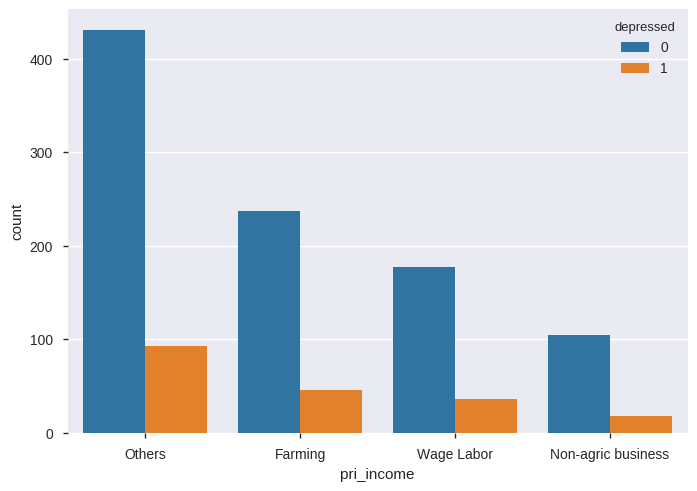

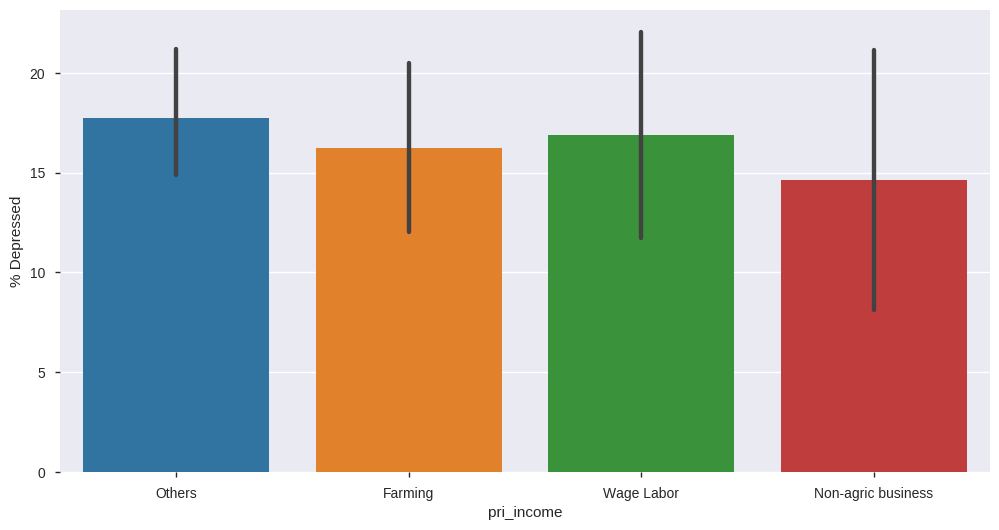

In [0]:
#Primary source of income versus depression evaluation
## Count of Primary source of income 
print("Total Count by Primary source of income")
print(df_mental.groupby('pri_income')['pri_income'].count())

print(df_mental.groupby('pri_income')['depressed'].describe())

## Count of depression by Primary source of income
print("Depression Count by Primary source of income")
print(df_mental.groupby('pri_income')['depressed'].sum())

#Bar chart
print("Bar Graph of Depression by Primary source of income")
ax = sns.countplot(x="pri_income", hue="depressed", data=df_mental)
plt.show

# Barplot of Percentage by Primary source of income versus depression
fig, ax = plt.subplots(figsize = (12,6))
ax = sns.barplot(x = 'pri_income',  y = 'depressed', data = df_mental , estimator = lambda x: sum(x==1)*100.0/len(x))
ax.set(ylabel ="% Depressed")

## 13. **Medical** **Expenses**

In [0]:
# to check the description of med_portion_sickinjured column
df_mental['med_portion_sickinjured'].describe()

count    809.000000
mean       0.519817
std        0.321305
min        0.000000
25%        0.250000
50%        0.500000
75%        0.750000
max        2.000000
Name: med_portion_sickinjured, dtype: float64

<function matplotlib.pyplot.show>

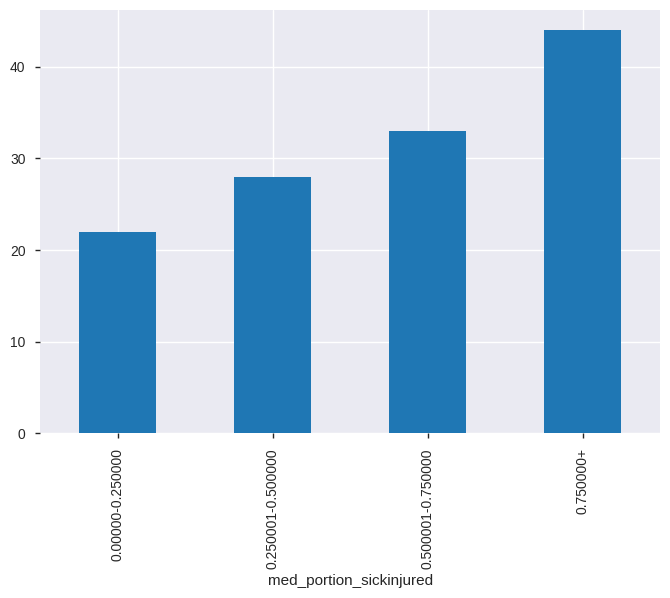

In [0]:
bins = [0.0,0.250000,0.500000,0.750000,2.0000]
labels = ['0.00000-0.250000','0.250001-0.500000','0.500001-0.750000','0.750000+']
df_mental['med_portion_sickinjured'] = pd.cut(df_mental['med_portion_sickinjured'], bins = bins,  labels = labels, right =False)

df_mental.groupby('med_portion_sickinjured')['depressed'].sum().plot(kind='bar')
plt.show